In [1]:
%matplotlib notebook
import sys
sys.path.append('..')
import pickle
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps
from magpie_data import NeLMap2, FaradayMap2, PolarimetryMap2, InterferogramOntoAlpha

In [2]:
%cd "~\Google Drive\MAGPIE\data\2016\s0831_16 Reconnection Al - Faraday\s0831_16 Faraday"

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0831_16 Reconnection Al - Faraday\s0831_16 Faraday


In [3]:
R0fn="s0831_16_101257_c1.png"
R1fn="s0831_16_101317_c2.png"
B0fn="s0831_16_105148_c1.png"
B1fn="s0831_16_105208_c2.png"
S0fn="s0831_16_110208_c1.png"
S1fn="s0831_16_110228_c2.png"
s=PolarimetryMap2(R0fn, R1fn, B0fn, B1fn, S0fn, S1fn, rot_angle=-2)

In [4]:
fig, ax=plt.subplots(1,2,figsize=(12,8))
ax[0].imshow(s.R0, clim=[0,0.1])
ax[1].imshow(s.R1, clim=[0,0.1])

<IPython.core.display.Javascript object>

In [6]:
constraints={'angle':(0,0.1),'scale':(1,0.1),'tx':(300,100),'ty':(120,100)}
t=pickle.load( open(s.fn[:8]+' faraday registration.p', "rb" ) )

In [8]:
s.register(constraints=constraints, transform=t)
s.convert_to_alpha()

C:\Users\jdhare\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
..\magpie_data.py:145: RuntimeWarning: invalid value encountered in true_divide
..\magpie_data.py:146: RuntimeWarning: invalid value encountered in true_divide
..\magpie_data.py:150: RuntimeWarning: invalid value encountered in arcsin


In [10]:
s.pickle_transform(fn=s.fn[:8]+' faraday registration.p')

In [5]:
fig, ax=plt.subplots(2,2,figsize=(12,8))
ax[0,0].imshow(s.R0, clim=[0,0.1])
ax[0,1].imshow(s.R1, clim=[0,0.1])
ax[1,0].imshow(s.result['timg'], clim=[0,0.1])
ax[1,1].imshow(s.R0-s.result['timg'], clim=[-0.01,0.01], cmap='bwr')

<IPython.core.display.Javascript object>

AttributeError: 'PolarimetryMap2' object has no attribute 'result'

In [ ]:
s.plot_data_px(clim=[-1,1])

In [9]:
s.scale=59.5
s.set_origin((1350,1732), extent=[-13,13,-11,11])

..\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [ ]:
s.plot_data_mm(clim=[-1,1])

<IPython.core.display.Javascript object>


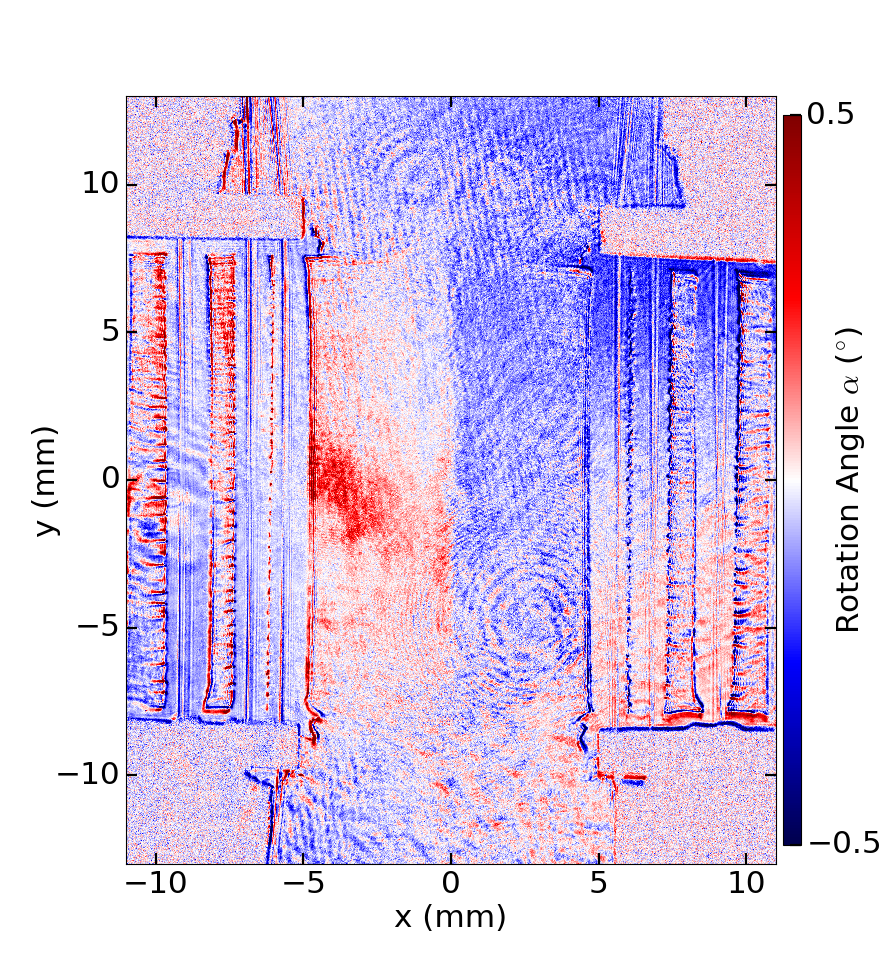

In [10]:
fig, ax=plt.subplots(figsize=(11,12))
far=s.plot_data_mm(ax=ax, clim=[-0.5,0.5])

ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('y (mm)',fontsize=28)

ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

ax.tick_params(labelsize=28, pad=5, length=10, width=2)
ax.get_yaxis().set_label_coords(-0.1,0.5)

cbar_ax = fig.add_axes([0.89, 0.12, 0.02, 0.76])#left,bottom,width,height
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-0.5,0.5])
cbar_ax.set_ylabel(r'Rotation Angle $\alpha$ ($^{\circ}$)',fontsize=28)

cbar_ax.get_yaxis().set_label_coords(2.9,0.5)



In [40]:
fig.savefig('s0831_16 polarogram.png', dpi=600, bbox_inches='tight')

(892, 476) (892, 833)


<IPython.core.display.Javascript object>


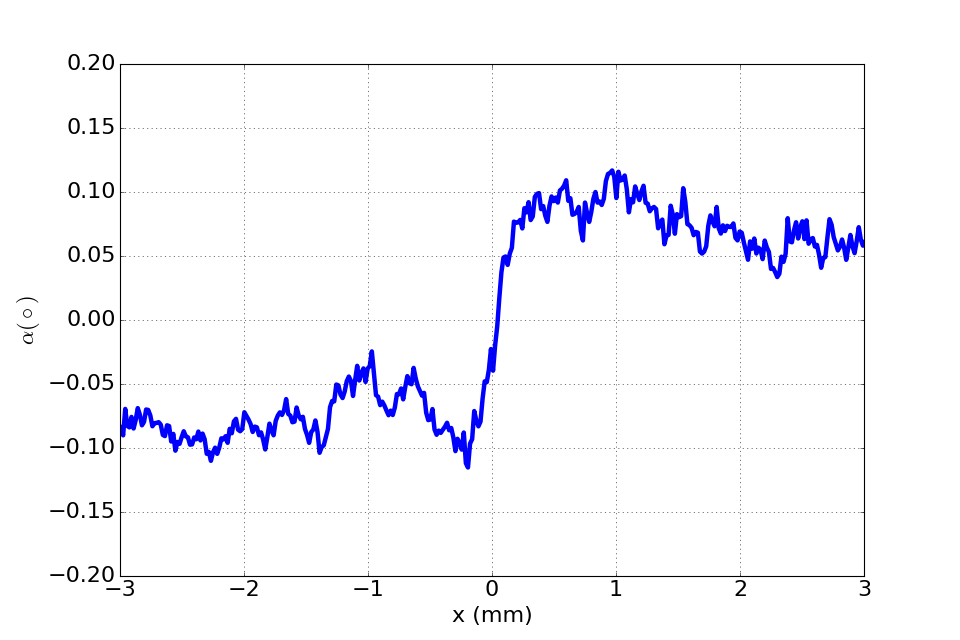

In [47]:
yy=-2
s.create_lineout(start=(yy,-3), end=(yy,3), lineout_width=1*s.scale)

fig, ax=plt.subplots(figsize=(12,8))
s.plot_lineout(ax=ax, label='Data')
ax.set_xlim([-3,3])
ax.set_xlabel('x (mm)', fontsize=20)
ax.set_ylim([-0.2,0.2])
ax.set_ylabel(r'$\alpha (\circ)$', fontsize=20)
ax.tick_params(labelsize=20)
#ax.set_title('s0831_16 B lineout', fontsize=23)

ax.grid(True)


In [48]:
fig.savefig('s0831_16 alpha lineout.png', dpi=300, bbox_inches='tight')

# Overlay Interferometry

In [8]:
%cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0831_16 Reconnection Al - Faraday"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0831_16 Reconnection Al - Faraday


In [9]:
I0fn="s0831_16 IR interferometry (1).JPG"
I1fn="s0831_16 IR interferometry (3).JPG"
IO=InterferogramOntoAlpha(s, I0fn, I1fn)

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [37]:
constraints={'angle':(0,0.1),'scale':(0.7,0.5),'ty':(0,400),'tx':(40,200)}

In [38]:
IO.register(constraints=constraints)

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [39]:
IO.transform

{'Dangle': 0.01308139534883721,
 'Dscale': 0.00035295303826237041,
 'Dt': 0.25,
 'angle': -0.0067050493463796101,
 'scale': 0.66617717510139185,
 'success': 0.0078638811349420485,
 'timg': array([[ 0.00147059,  0.00147059,  0.00147059, ...,  0.00147059,
          0.00147059,  0.00147059],
        [ 0.00147059,  0.00147059,  0.00147059, ...,  0.00147059,
          0.00147059,  0.00147059],
        [ 0.00147059,  0.00147059,  0.00147059, ...,  0.00147059,
          0.00147059,  0.00147059],
        ..., 
        [ 0.00147059,  0.00147059,  0.00147059, ...,  0.00147059,
          0.00147059,  0.00147059],
        [ 0.00147059,  0.00147059,  0.00147059, ...,  0.00147059,
          0.00147059,  0.00147059],
        [ 0.00147059,  0.00147059,  0.00147059, ...,  0.00147059,
          0.00147059,  0.00147059]]),
 'tvec': array([-57.94406804,  44.64747249])}

<IPython.core.display.Javascript object>


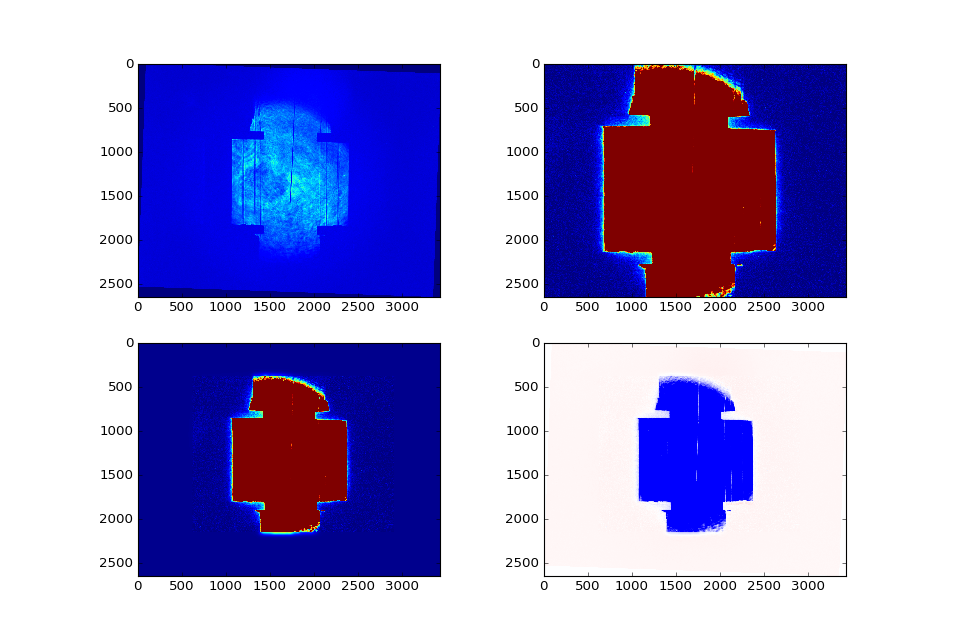

In [40]:
fig, ax=plt.subplots(2,2,figsize=(12,8))
ax[0,0].imshow(s.R0, clim=[0,0.1])
ax[0,1].imshow(IO.I0zcn, clim=[0,0.1])
ax[1,0].imshow(IO.transform['timg'], clim=[0,0.1])
ax[1,1].imshow(s.R0-IO.transform['timg'], clim=[-0.2,0.2], cmap='bwr')

<IPython.core.display.Javascript object>


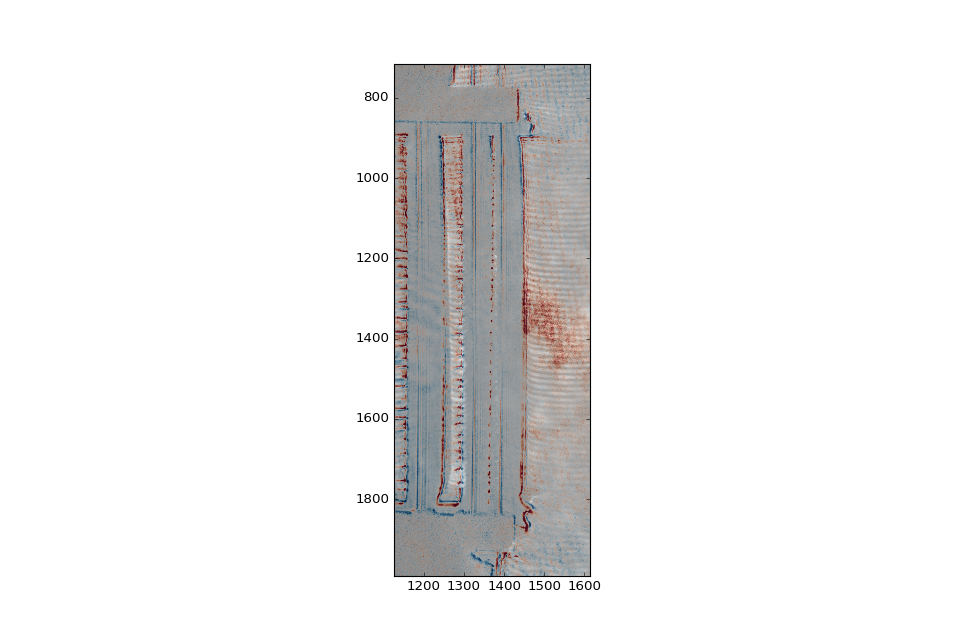

In [41]:
IO.plot_overlay_px(transparency=0.4, clim=[-0.5,0.5])

In [42]:
IO.scale=s.scale
IO.set_origin(s.origin, extent=[-13,13,-11,11])

<IPython.core.display.Javascript object>


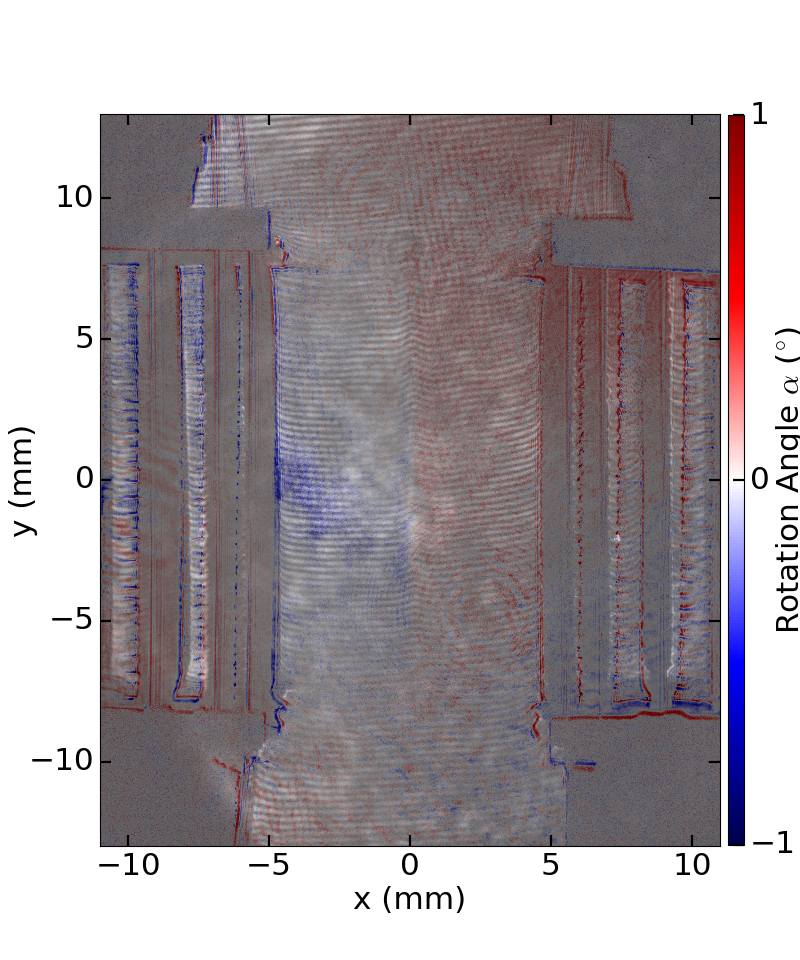

In [45]:
fig, ax=plt.subplots(figsize=(10,12))
far=s.plot_data_mm(ax=ax, clim=[-1,1])

ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('y (mm)',fontsize=28)

ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

ax.tick_params(labelsize=28, pad=5, length=10, width=2)
ax.get_yaxis().set_label_coords(-0.1,0.5)

ax.imshow(IO.data_c, cmap='gray', alpha=0.6, extent=s.extent)


cbar_ax = fig.add_axes([0.91, 0.12, 0.02, 0.76])#left,bottom,width,height
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-1,0,1])
cbar_ax.set_ylabel(r'Rotation Angle $\alpha$ ($^{\circ}$)',fontsize=28)

cbar_ax.get_yaxis().set_label_coords(2.9,0.5)


In [52]:
fig.savefig('s0830_16 polarogram w interferometry.png', dpi=300, bbox_inches='tight')

(773, 476) (773, 833)


<IPython.core.display.Javascript object>


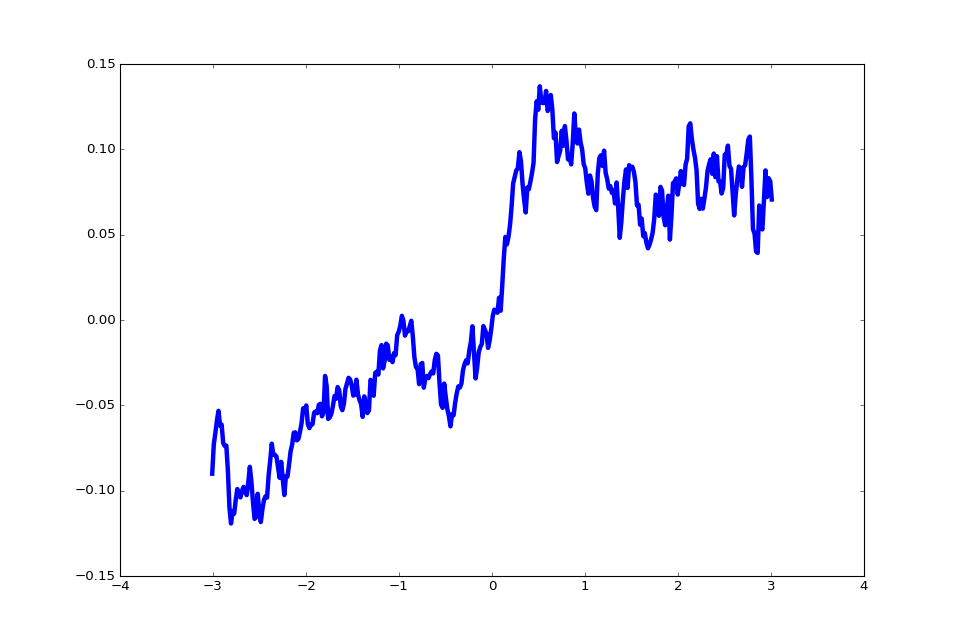

In [27]:
yy=0
s.create_lineout(start=(yy,-3), end=(yy,3), lineout_width=1*s.scale)
fig, ax=plt.subplots(figsize=(12,8))
s.plot_lineout(ax=ax, label='Data')


# Bring in The Density Map

In [11]:
%cd "~\Google Drive\MAGPIE\data\2016\s0831_16 Reconnection Al - Faraday"

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0831_16 Reconnection Al - Faraday


In [12]:
I0fn="s0831_16 IR interferometry (1).JPG"
nefn="s0831_16 IR neL.txt"
b=FaradayMap2(s, I0fn, nefn)
constraints={'angle':(0,0.1),'scale':(0.7,0.5),'ty':(0,400),'tx':(40,200)}
tt=pickle.load( open(s.fn[:8]+' interferometry registration.p', "rb" ) )

C:\Users\jdhare\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [13]:
b.register(constraints=constraints, transform=tt)

..\magpie_data.py:235: RuntimeWarning: divide by zero encountered in true_divide
..\magpie_data.py:235: RuntimeWarning: overflow encountered in true_divide
..\magpie_data.py:235: RuntimeWarning: invalid value encountered in true_divide


In [14]:
b.transform

{'angle': -0.0021196201346640464,
 'scale': 0.72917412314203345,
 'tvec': array([-29.0376151 ,  47.93228516])}

In [14]:
b.scale=s.scale
b.set_origin(s.origin, extent=[-13,13,-6,6])

..\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


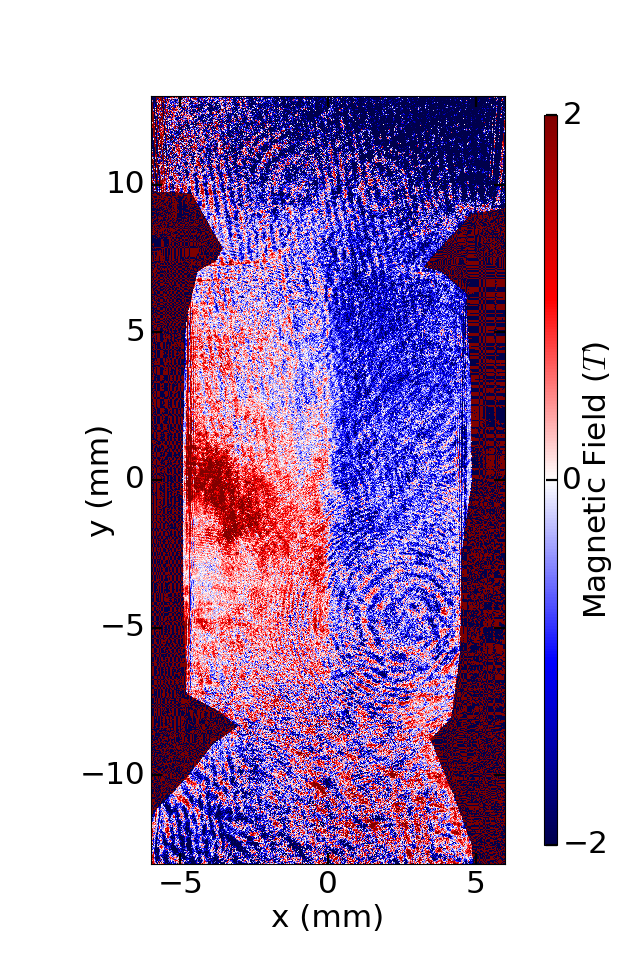

In [15]:
fig, ax=plt.subplots(figsize=(8,12))
far=b.plot_data_mm(ax=ax, clim=[-2,2])
ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('y (mm)',fontsize=28)

ax.set_xticks([-5,0,5])
ax.set_yticks([-10,-5,0,5,10])

ax.tick_params(labelsize=28, pad=5, length=10, width=2)
ax.get_yaxis().set_label_coords(-0.1,0.5)

cbar_ax = fig.add_axes([0.85, 0.12, 0.02, 0.76])#left,bottom,width,height
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-2,0,2])
cbar_ax.set_ylabel(r'Magnetic Field ($T$)',fontsize=28)

cbar_ax.get_yaxis().set_label_coords(2.9,0.5)

In [16]:
b.pickle_transform(fn=s.fn[:8]+' interferometry registration.p')

In [23]:
fig.savefig('s0831_16 B field.png', dpi=300, bbox_inches='tight')

In [17]:
s0830_16_ne=NeLMap2('s0831_16 IR neL.txt', scale=s.scale) 
ne=s0830_16_ne
ne.data=b.I1T
ne.scale=s.scale
ne.set_origin(origin=s.origin, extent=[-13,13,-6,6])

..\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(773, 178) (773, 535)
 - Adding parameter for hint "B0"
 - Adding parameter for hint "x0"
 - Adding parameter for hint "L"
 - Adding parameter for hint "C"
 - Adding parameter "x0"
 - Adding parameter "B0"
 - Adding parameter "L"
 - Adding parameter "C"


<IPython.core.display.Javascript object>


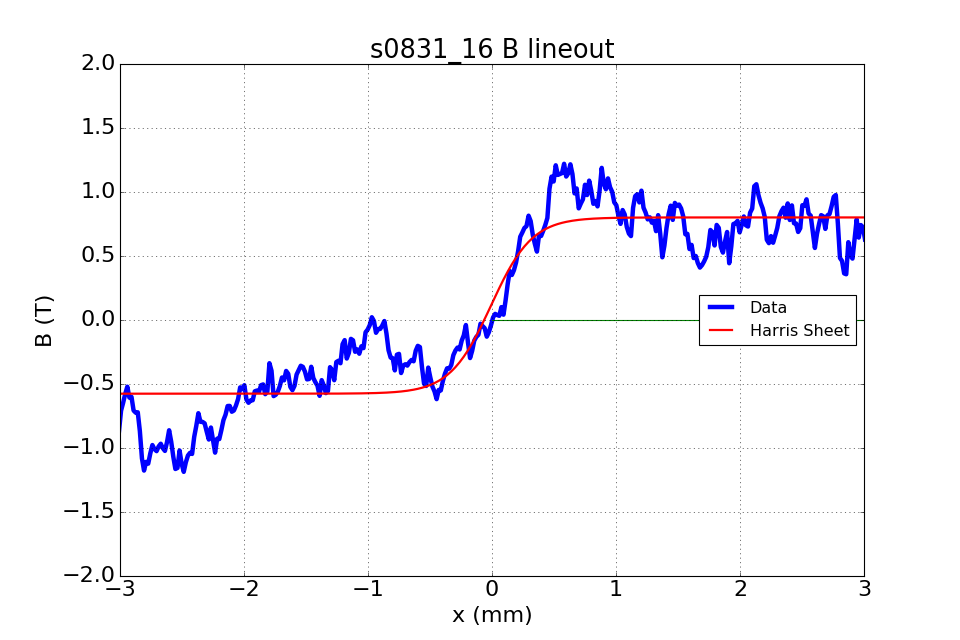

In [17]:
from lmfit import Model

def Harris(x, x0, B0, L,C):
    return B0*np.tanh((x-x0)/L)+C
hm=Model(Harris, independent_vars='x')
hm.set_param_hint('B0', value = 4)
hm.set_param_hint('x0', value = 0)
hm.set_param_hint('L', value = 0.25)
hm.set_param_hint('C', value = 0)

yy=-0
b.create_lineout(start=(yy,-3), end=(yy,3), lineout_width=1*s.scale)

res=hm.fit(b.lo, x=b.mm)
L_fit=res.best_values['L']
B0_fit=res.best_values['B0']


fig, ax=plt.subplots(figsize=(12,8))
b.plot_lineout(ax=ax, label='Data')
ax.plot(b.mm, res.best_fit, lw=2, c='r', label='Harris Sheet')
ax.set_xlim([-3,3])
ax.set_xlabel('x (mm)', fontsize=20)
ax.set_ylim([-2,2])
ax.set_ylabel('B (T)', fontsize=20)
ax.tick_params(labelsize=20)
ax.set_title('s0831_16 B lineout', fontsize=23)

ax.grid(True)
ax.legend(loc=5)

In [26]:
import csv
data=list(zip(b.mm,b.lo, res.best_fit))
headings=('x', 'B_data', 'B_fit')
units=('mm', 'T', 'T')
with open(s.fn+'B profile.txt', 'wt') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(headings)
    writer.writerow(units)
    for f in data:
        writer.writerow(f)

In [25]:
fig.savefig('s0831_16 B field lineout.png', dpi=300, bbox_inches='tight')

# Electron density

In [107]:
s0825_16_IR=NeLMap2('s0825_16 IR neL.txt', scale=99)

<IPython.core.display.Javascript object>


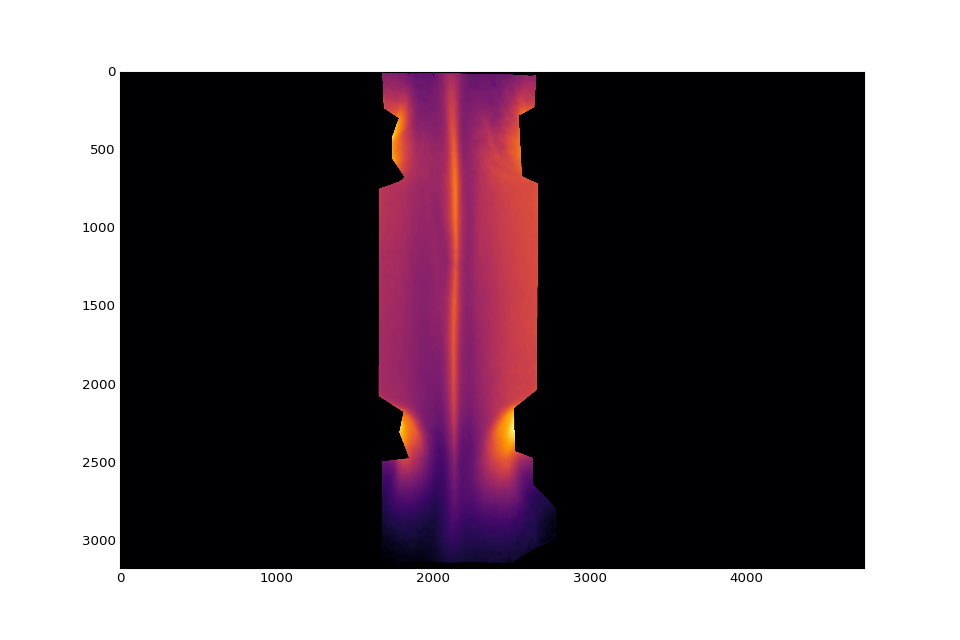

In [108]:
ne=s0825_16_IR
ne.plot_data_px()

## Bring in corrections to alpha

In [51]:
origin=b.origin
scale=b.scale
extent=b.extent[2:4]+b.extent[0:2]

ymin=origin[0]-extent[1]*scale
ymax=origin[0]-extent[0]*scale
xmin=origin[1]+extent[2]*scale
xmax=origin[1]+extent[3]*scale
n_e_cropped=b.IT[ymin:ymax, xmin:xmax] 

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: overflow encountered in true_divide
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


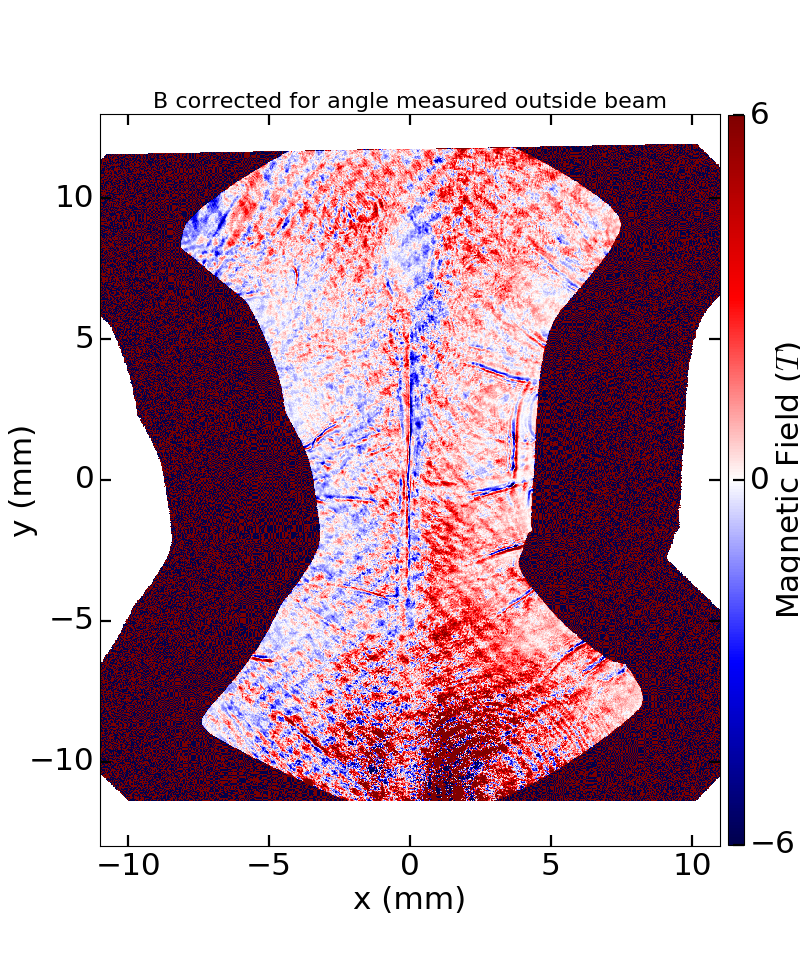

In [66]:
B_metal=5.99e18*alpha_metal/n_e_cropped

fig, ax=plt.subplots(figsize=(10,12))
far=ax.imshow(B_metal, cmap=b.cmap, interpolation='none', clim=[-6,6], extent=b.extent, aspect=1)
ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('y (mm)',fontsize=28)

ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

ax.tick_params(labelsize=28, pad=5, length=10, width=2)
ax.get_yaxis().set_label_coords(-0.1,0.5)

ax.set_title('B corrected for angle measured outside beam', fontsize=20)

cbar_ax = fig.add_axes([0.91, 0.12, 0.02, 0.76])#left,bottom,width,height
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-6,0,6])
cbar_ax.set_ylabel(r'Magnetic Field ($T$)',fontsize=28)

cbar_ax.get_yaxis().set_label_coords(2.9,0.5)

In [67]:
fig.savefig('s0701_16 B corrected for angle outside laser beam.png', dpi=600, bbox_inches='tight')

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: overflow encountered in true_divide
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


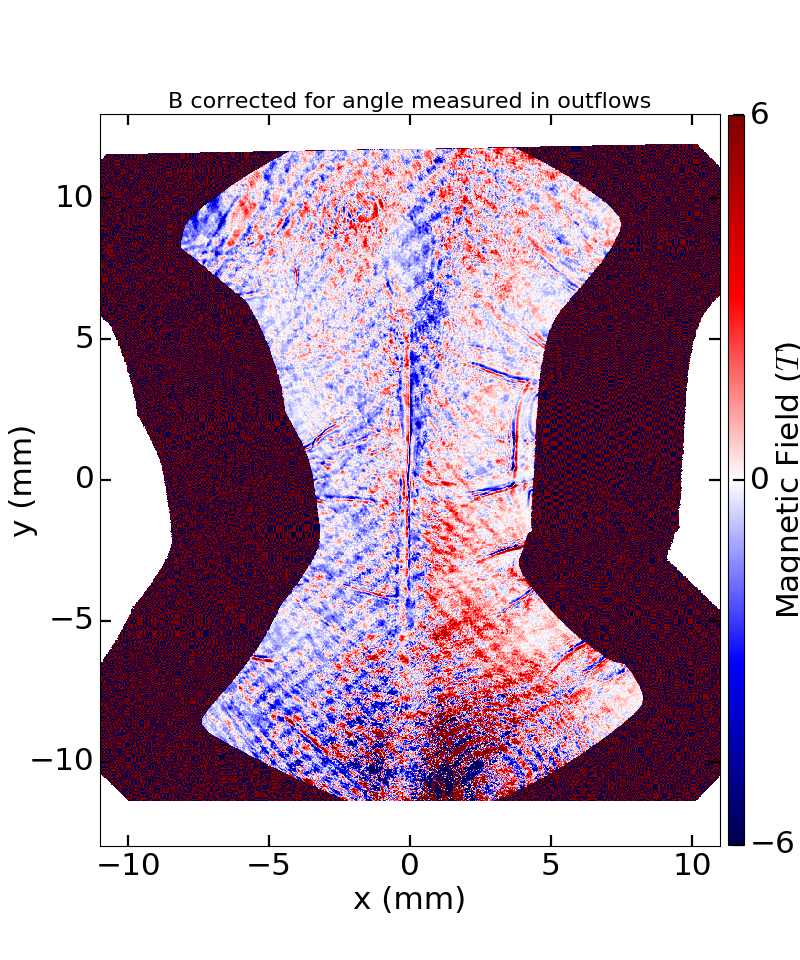

In [68]:
B_outflow=5.99e18*alpha_outflows/n_e_cropped

fig, ax=plt.subplots(figsize=(10,12))
far=ax.imshow(B_outflow, cmap=b.cmap, interpolation='none', clim=[-6,6], extent=b.extent, aspect=1)
ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('y (mm)',fontsize=28)

ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

ax.tick_params(labelsize=28, pad=5, length=10, width=2)
ax.get_yaxis().set_label_coords(-0.1,0.5)

ax.set_title('B corrected for angle measured in outflows', fontsize=20)

cbar_ax = fig.add_axes([0.91, 0.12, 0.02, 0.76])#left,bottom,width,height
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-6,0,6])
cbar_ax.set_ylabel(r'Magnetic Field ($T$)',fontsize=28)

cbar_ax.get_yaxis().set_label_coords(2.9,0.5)

In [69]:
fig.savefig('s0701_16 B corrected for angle in outflows.png', dpi=600, bbox_inches='tight')

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\colors.py:576: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


# Just Interferometry

In [132]:
s0701_16_endon=NeLMap2('s0701_16 IR neL.txt', scale=102, multiply_by=1/1.6, rot_angle=-90)
i=s0701_16_endon

<IPython.core.display.Javascript object>


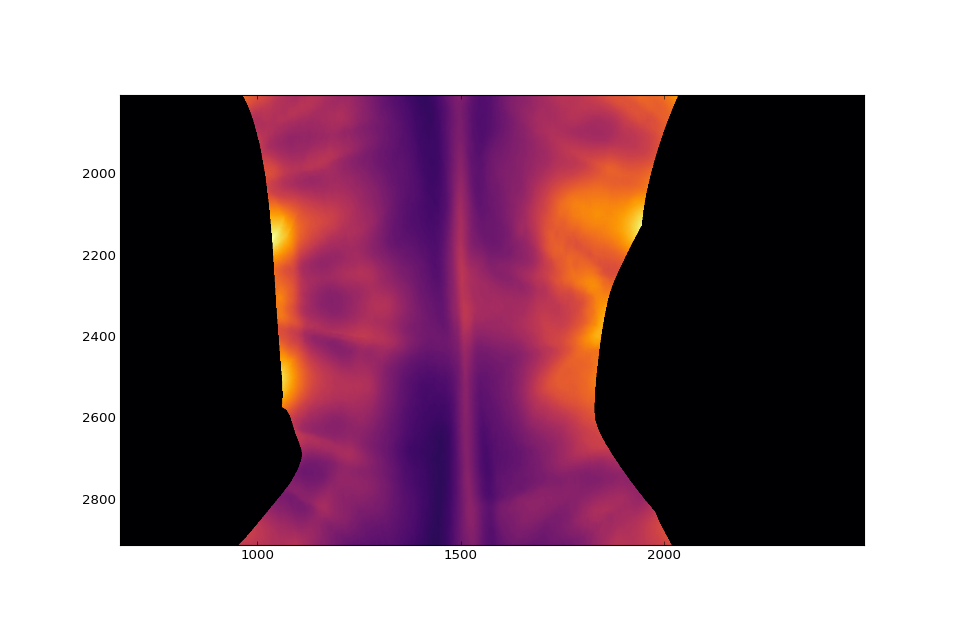

In [133]:
i.plot_data_px()

<IPython.core.display.Javascript object>


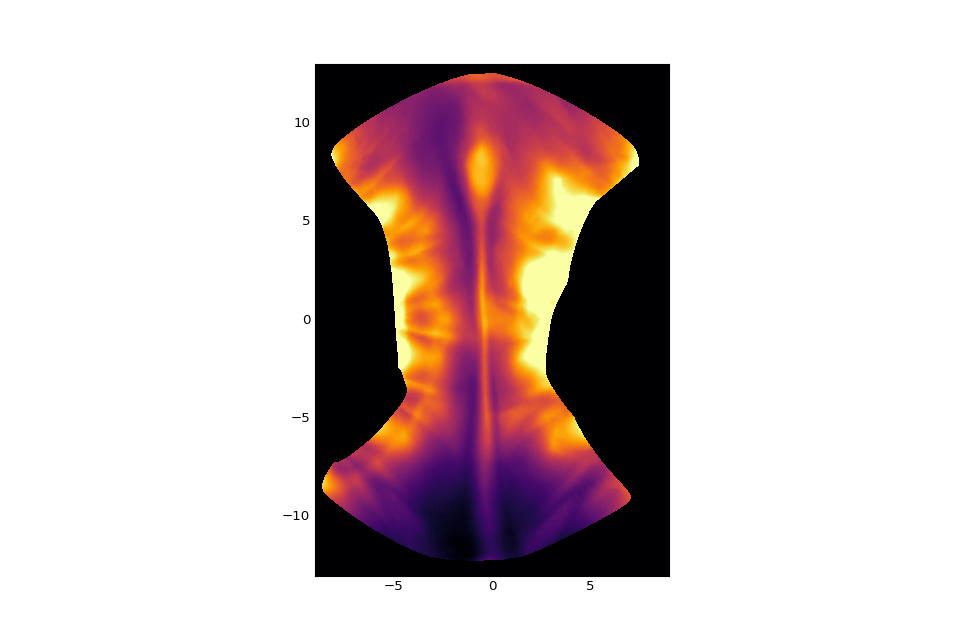

In [138]:
i.set_origin(origin=(2326,1550), extent=[-13,13,-9,9])
i.plot_data_mm(multiply_by=1e-18, clim=[0,1])

<IPython.core.display.Javascript object>


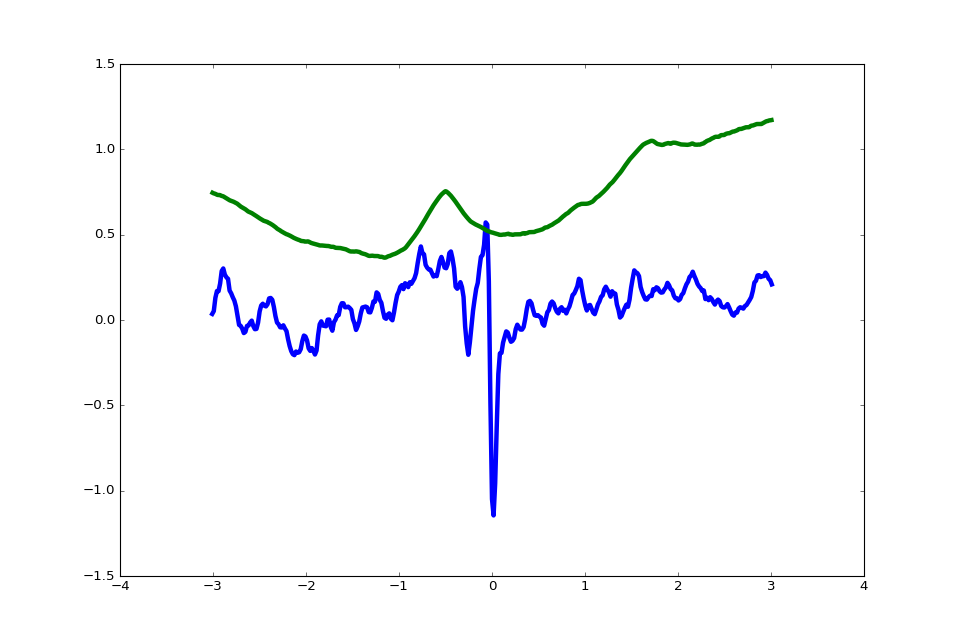

(666, 472) (666, 826)
(1152, 612) (1152, 1224)


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [141]:
fig, ax=plt.subplots(figsize=(12,8))

yy=-1.7
w=0.2
s.create_lineout(start=(yy,-3), end=(yy,3), lineout_width=w*s.scale)
s.plot_lineout(ax=ax)
i.create_lineout(start=(yy,-3), end=(yy,3), lineout_width=w*s.scale)
i.plot_lineout(ax=ax, multiply_by=1e-18)
ax.legend()

# Old Code

<IPython.core.display.Javascript object>


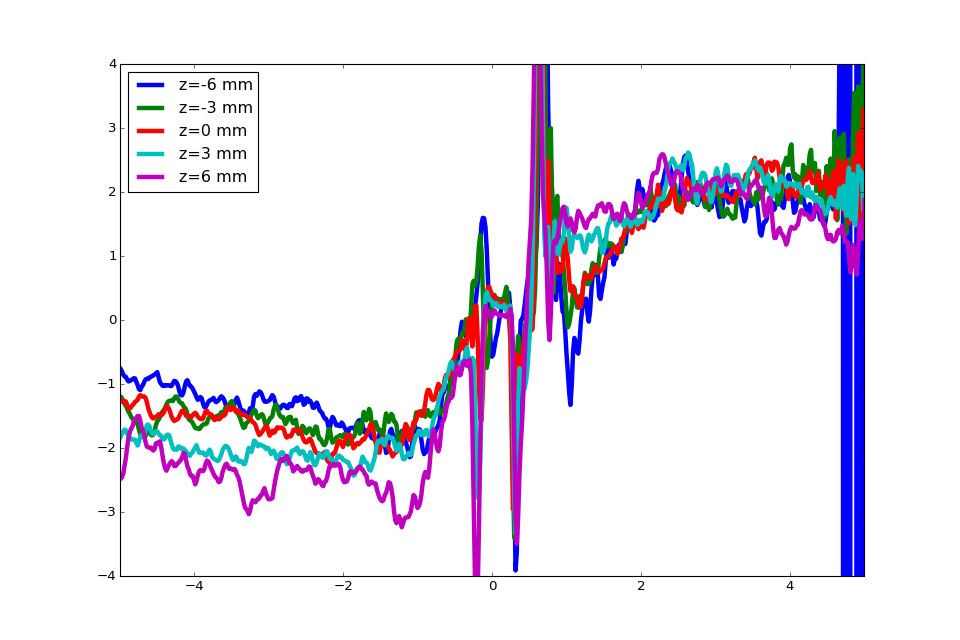

(798, 114) (798, 684)
(627, 114) (627, 684)
(456, 114) (456, 684)
(285, 114) (285, 684)
(114, 114) (114, 684)


In [26]:
fig,ax=plt.subplots(figsize=(12,8))

for z in [-6,-3,0,3,6]:
    b.create_lineout(start=(z,-5), end=(z,5), lineout_width=b.scale*2)
    b.plot_lineout(ax=ax, label='z='+str(z)+' mm')

ax.set_ylim([-4,4])
ax.set_xlim([-5,5])
ax.legend(loc=2)

(456, 171) (456, 627)
 - Adding parameter for hint "B0"
 - Adding parameter for hint "x0"
 - Adding parameter for hint "L"
 - Adding parameter for hint "C"
 - Adding parameter "x0"
 - Adding parameter "B0"
 - Adding parameter "L"
 - Adding parameter "C"


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


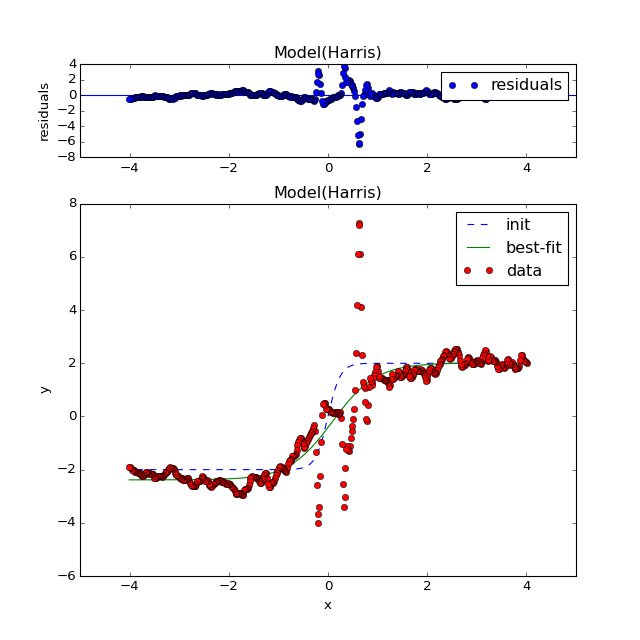

[[Model]]
    Model(Harris)
[[Fit Statistics]]
    # function evals   = 28
    # data points      = 457
    # variables        = 4
    chi-square         = 290.465
    reduced chi-square = 0.641
[[Variables]]
    B0:   2.19717585 +/- 0.051789 (2.36%) (init= 2)
    x0:   0.09147220 +/- 0.048188 (52.68%) (init= 0)
    L:    0.88652383 +/- 0.084662 (9.55%) (init= 0.25)
    C:   -0.18862801 +/- 0.045826 (24.29%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(x0, C)                     =  0.576 
    C(B0, L)                     =  0.573 



In [40]:
from lmfit import Model

def Harris(x, x0, B0, L,C):
    return B0*np.tanh((x-x0)/L)+C
hm=Model(Harris, independent_vars='x')
hm.set_param_hint('B0', value = 2)
hm.set_param_hint('x0', value = 0)
hm.set_param_hint('L', value = 0.25)
hm.set_param_hint('C', value = 0)

y=4

b.create_lineout(start=(y,-4), end=(y,4), lineout_width=b.scale*2)

res=hm.fit(b.lo, x=b.mm)
L_fit=res.best_values['L']
B0_fit=res.best_values['B0']
res.plot(fig_kws={'figsize':(8,8)})
print(res.fit_report())

In [ ]:
l=0.2
fig, ax=plt.subplots(2,2, figsize=(12,10), sharex=True, sharey=True)
ax[0,0].imshow(s.R0, cmap='seismic', clim=[-l,l])
ax[0,1].imshow(-s.R1, cmap='seismic', clim=[-l,l])
ax[1,0].imshow(s.R0-s.result['timg'], cmap='seismic', clim=[-l,l])
ax[1,1].imshow(-s.result['timg'], cmap='seismic', clim=[-l,l])

# Study Interferometry

In [8]:
cd "~\Google Drive\MAGPIE\data\2016\s0405_16 C RECONNECTION FARADAY\"

/Users/jdhare/Google Drive/MAGPIE/data/2016/s0405_16 C RECONNECTION FARADAY


In [14]:
ne="s0405_16 side on neL.txt"
scale=1463/16.0
s=NeLMap2(ne, scale=scale, rot_angle=1.5)

<IPython.core.display.Javascript object>


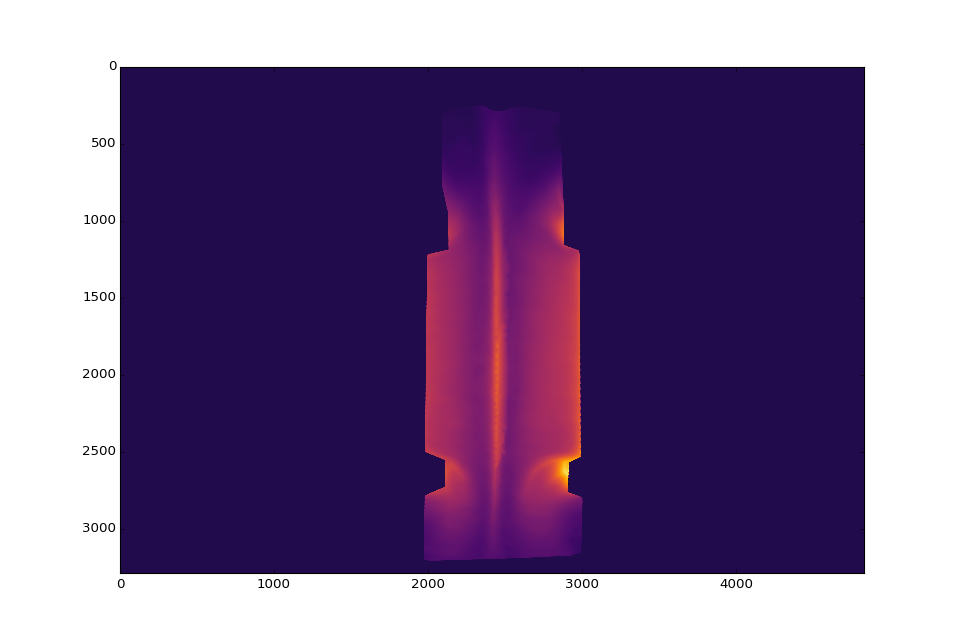

In [13]:
s.plot_data_px()

In [48]:
s.set_origin(origin=(1900,2450), extent=[-18,18,-5,5])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


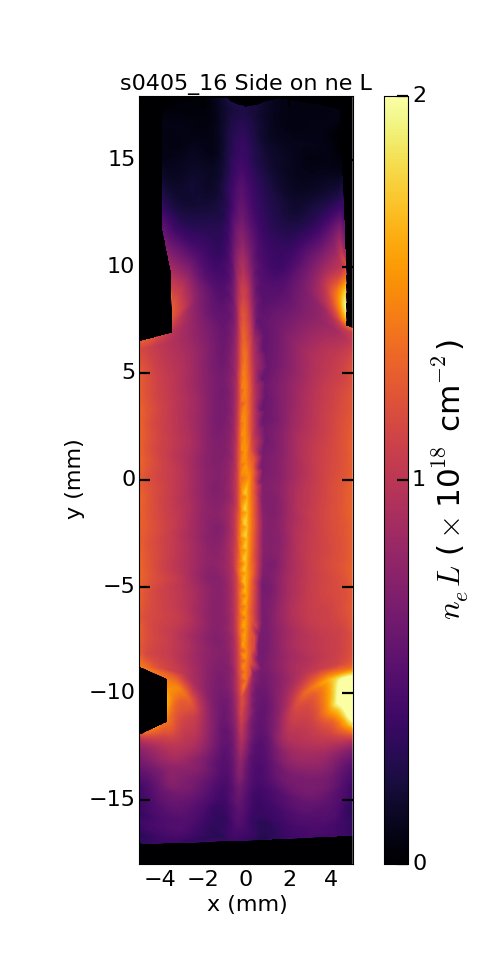

In [87]:
fig, ax3 =plt.subplots(figsize=(6,12))
im=s.plot_data_mm(ax=ax3,multiply_by=1e-18, clim=[0,2])

ax3.tick_params(labelsize=20, pad=5, length=10, width=2)
ax3.set_xlabel('x (mm)', fontsize=20)
ax3.set_ylabel('y (mm)', fontsize=20)


cbar_ax = fig.add_axes([0.8, 0.10, 0.05, 0.8])#l,b,w,h
cbar_ax.tick_params(labelsize=20, pad=5, length=10, width=2)
fig.colorbar(im, cax=cbar_ax, ticks=[0.0,1,2,3.0])
cbar_ax.set_ylabel(r'$n_e L$ ($\times$ 10$^{18}$ cm$^{-2}$)',fontsize=28)

ax3.set_title('s0405_16 Side on ne L', fontsize=20)

In [88]:
fig.savefig('s0405_16 side on neL.png')

In [94]:
below=s.data[1190-6*scale:1190, 2140:2860]
centre=s.data[1190:2530, 2140:2860]#s.data[1860-3*scale:1860+3*scale, 2140:2860]#
above=s.data[2530:2530+6*scale, 2140:2860]

b_s=np.sum(below,axis=0)
c_s=np.sum(centre,axis=0)
a_s=np.sum(above,axis=0)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [31]:
mm=np.linspace(-306/scale, 306/scale, 306*2)

In [81]:
(1190+2530)/2

1860.0

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


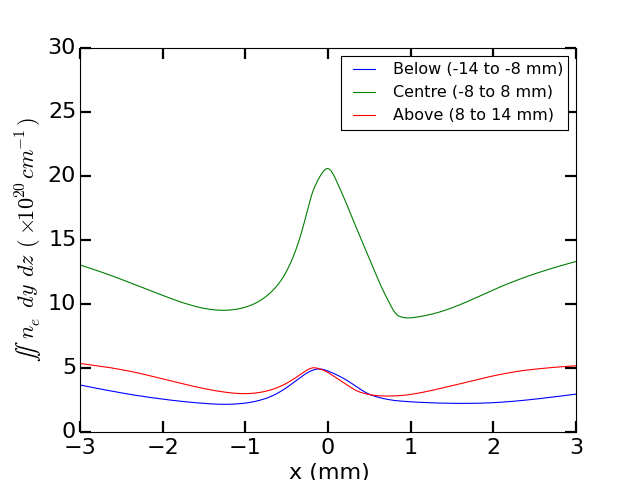

In [96]:
fig,ax=plt.subplots()
ax.plot(mm,b_s[0:306*2]/1e20, label='Below (-14 to -8 mm)')
ax.plot(mm,c_s[0:306*2]/1e20, label='Centre (-8 to 8 mm)')
ax.plot(mm,a_s[0:306*2]/1e20, label='Above (8 to 14 mm)')

ax.set_xlim([-3,3])
ax.set_xlabel('x (mm)', fontsize=20)
ax.tick_params(labelsize=20, pad=5, length=10, width=2)

ax.set_ylim([0,30])
ax.set_ylabel(r'$\iint\, n_e\, dy\, dz\, (\times 10^{20} cm^{-1})$', fontsize=20)

ax.legend()

In [97]:
fig.savefig('s0405_16 density in unequal regions.png')